## Predição de vendas a partir de gastos publicitários usando Regressão Linear
### O original encontra-se disponível [aqui](https://github.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition).

In [76]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
advertising = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter05/Datasets/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


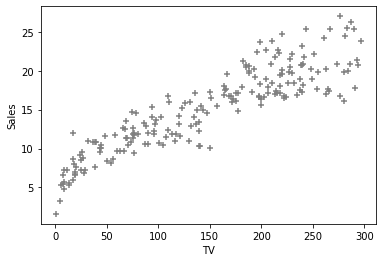

In [77]:
plt.scatter(advertising.TV, advertising.Sales, marker="+", color='gray')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [79]:
lr.fit(advertising[['TV']], advertising[['Sales']])

LinearRegression()

#### Plotando a linha correspondente a hipótese encontrada

In [80]:
sales_pred = lr.predict(advertising[['TV']])

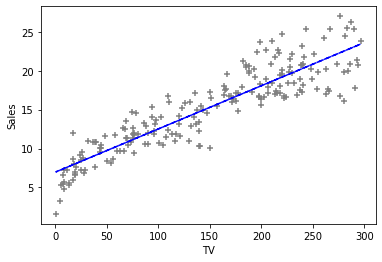

In [81]:
plt.plot(advertising.TV, sales_pred,"k--", color='blue')
plt.scatter(advertising.TV, advertising.Sales, \
            marker='+', color='gray')
plt.xlabel("TV")
plt.ylabel('Sales')
plt.show()

## Engenharia de Atributos (Feature Engineering) para predição de receita de clientes

In [82]:
import pandas as pd
import datetime as dt
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter05/Datasets/azra_retail_transactions.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom


In [83]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [84]:
# Calculando a receita da transação
df['revenue'] = df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,revenue
0,546729,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2020-03-16 11:36:00,1.25,18231.0,United Kingdom,15.0
1,559898,21868,POTTING SHED TEA MUG,6,2020-07-13 12:18:00,1.25,16225.0,United Kingdom,7.5
2,548648,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2020-04-01 13:20:00,0.85,12949.0,United Kingdom,20.4
3,540543,22173,METAL 4 HOOK HANGER FRENCH CHATEAU,4,2020-01-09 15:23:00,2.95,14395.0,United Kingdom,11.8
4,561390,20726,LUNCH BAG WOODLAND,10,2020-07-27 09:52:00,1.65,17068.0,United Kingdom,16.5


In [85]:
operations = {'revenue':'sum', 'InvoiceDate':'first', 'CustomerID':'first'}
# Agrupor por Número da Fatura e somar a receita              
df = df.groupby('InvoiceNo').agg(operations)

In [86]:
df.head()

,revenue,InvoiceDate,CustomerID
InvoiceNo,,,
536365,139.12,2019-12-01 08:26:00,17850.0
536366,22.20,2019-12-01 08:28:00,17850.0
536367,278.73,2019-12-01 08:34:00,13047.0
536368,70.05,2019-12-01 08:34:00,13047.0
536369,17.85,2019-12-01 08:35:00,13047.0


In [87]:
df['year'] = df['InvoiceDate'].dt.year

In [88]:
# Quantidade de dias desde 31/12/2019
df['days_since'] = (dt.datetime(year=2019, month=12, day=31) - df['InvoiceDate']).apply(lambda x: x.days)

In [89]:
operations = {'revenue':'sum',\
              'days_since':['max','min','nunique']}
# Agregar por cliente e somar a receita, o maximo, mínimo de dias depois de 31/12/2019 e a quantidade de Faturas
X = df[df['year'] == 2019].groupby('CustomerID').agg(operations)

X.head()

revenue days_since            
                sum        max min nunique
CustomerID                                
12347.0      711.79         23  23       1
12348.0      892.80         14  14       1
12370.0     1868.02         16  13       2
12377.0     1001.52         10  10       1
12383.0      600.72          8   8       1

In [90]:
# Simplificar o nome das colunas
X.columns = [' '.join(col).strip() for col in X.columns.values]

In [91]:
X.head()

,revenue sum,days_since max,days_since min,days_since nunique
CustomerID,,,,
12347.0,711.79,23,23,1
12348.0,892.80,14,14,1
12370.0,1868.02,16,13,2
12377.0,1001.52,10,10,1
12383.0,600.72,8,8,1


In [92]:
# Receita média da fatura
X['avg_order_cost'] = X['revenue sum']/X['days_since nunique']

In [94]:
# Carregar na variável y a Receita de cada cliente no ano de 2020
y = df[df['year'] == 2020].groupby('CustomerID')['revenue'].sum()

In [95]:
wrangled_df = pd.concat([X,y], axis=1)
wrangled_df.columns = ['revenue_2019', 'days_since_first_purchase', 'days_since_last_purchase', 'number_of_purchases', 'avg_order_cost', 'revenue_2020']
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,77183.60
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12349.0,NaN,NaN,NaN,NaN,NaN,1757.55
12350.0,NaN,NaN,NaN,NaN,NaN,334.40


In [38]:
# Eliminando registros de clientes sem receita
wrangled_df = wrangled_df[~wrangled_df.revenue_2019.isnull()]
wrangled_df = wrangled_df[~wrangled_df.revenue_2020.isnull()]

In [96]:
# O que está sendo realizado nesta célula e por que?
wrangled_df = wrangled_df[wrangled_df.revenue_2020 < ((wrangled_df.revenue_2020.median()) + wrangled_df.revenue_2020.std()*3)]
wrangled_df = wrangled_df[wrangled_df.revenue_2019 < ((wrangled_df.revenue_2019.median()) + wrangled_df.revenue_2019.std()*3)]

In [97]:
# Salvando o dataframe num arquivo csv
wrangled_df.to_csv('wrangled_transactions.csv')
wrangled_df.head()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
CustomerID,,,,,,
12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
12348.0,892.80,14.0,14.0,1.0,892.80,904.44
12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


## Examinando Relações entre Preditores e Resultado
#### Você treinará um modelo de regressão linear com a coluna revenue_2020 como variável dependente e o restante das variáveis como variáveis independentes. Você usará a abordagem de teste de treinamento para certificar-se de treinar o modelo em parte dos dados e avaliá-lo nos dados de teste não vistos.

In [98]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

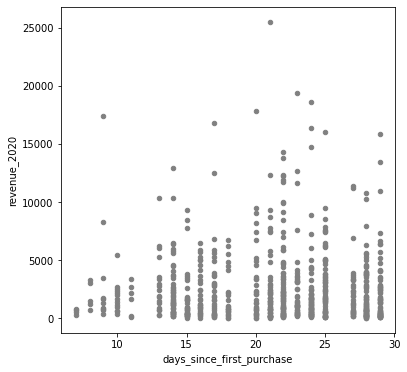

In [99]:
df.plot.scatter(x="days_since_first_purchase", y="revenue_2020", figsize=[6,6], color='gray')
plt.show()

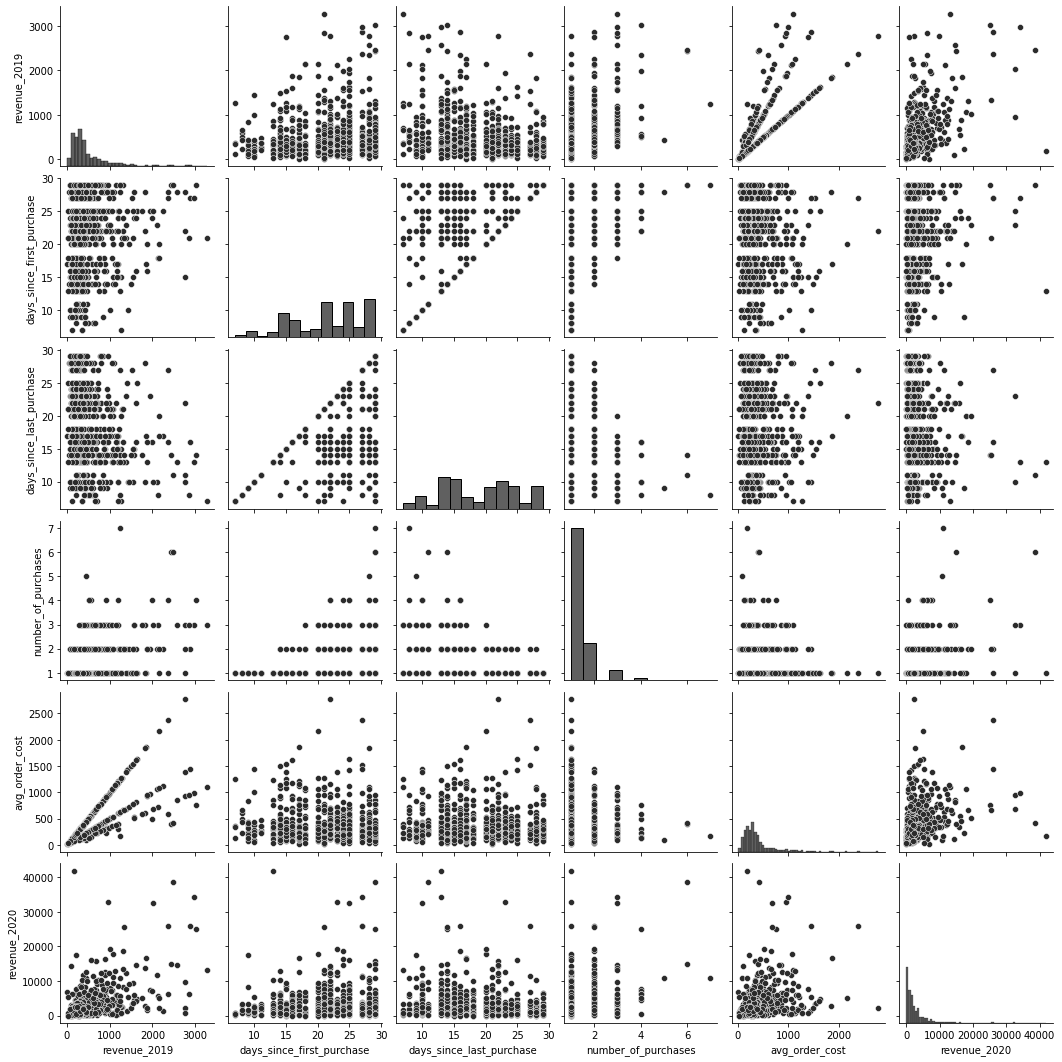

In [43]:
import seaborn as sns
sns.set_palette('Greys_r')
sns.pairplot(df)
plt.show()

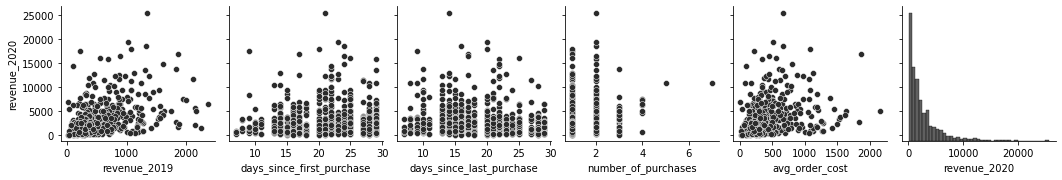

In [100]:
# Mais útil visualizar apenas uma linha dessa matriz
sns.pairplot(df, x_vars=df.columns, y_vars="revenue_2020")
plt.show()

In [45]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.109692,-0.254964,0.504438,0.779401,0.548234
days_since_first_purchase,0.109692,1.000000,0.641574,0.327502,-0.074321,0.061743
days_since_last_purchase,-0.254964,0.641574,1.000000,-0.398268,-0.054051,-0.171294
number_of_purchases,0.504438,0.327502,-0.398268,1.000000,-0.012466,0.355751
avg_order_cost,0.779401,-0.074321,-0.054051,-0.012466,1.000000,0.357384
revenue_2020,0.548234,0.061743,-0.171294,0.355751,0.357384,1.000000


## Construindo um modelo linear para prever os gastos dos cliente

In [101]:
df = pd.read_csv('wrangled_transactions.csv', index_col='CustomerID')

In [102]:
df.corr()

,revenue_2019,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,revenue_2020
revenue_2019,1.000000,0.069654,-0.229845,0.434233,0.809460,0.488375
days_since_first_purchase,0.069654,1.000000,0.665498,0.317724,-0.109867,0.016252
days_since_last_purchase,-0.229845,0.665498,1.000000,-0.384981,-0.046768,-0.159274
number_of_purchases,0.434233,0.317724,-0.384981,1.000000,-0.066624,0.277712
avg_order_cost,0.809460,-0.109867,-0.046768,-0.066624,1.000000,0.360402
revenue_2020,0.488375,0.016252,-0.159274,0.277712,0.360402,1.000000


In [104]:
X = df[['revenue_2019', 'days_since_last_purchase', 'number_of_purchases',  'avg_order_cost']]
y = df['revenue_2020']

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [106]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
model.coef_

array([  5.78799016,   7.47737544, 336.60769871,  -2.0558923 ])

In [52]:
# O que é e qual a interpretação deste valor?
model.intercept_

264.8693265705974

In [107]:
single_customer = pd.DataFrame({
    'revenue_2019': [1000],
    'days_since_last_purchase': [20],
    'number_of_purchases': [2],
    'avg_order_cost': [500]
})

model.predict(single_customer)

array([4642.16394904])

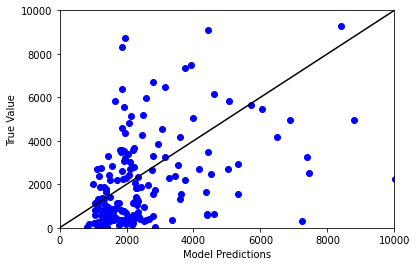

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plotar o valor real e a predição
# Como interpretar este gráfico ?
plt.scatter(model.predict(X_test), y_test, color='blue')
plt.xlim(0,10000)
plt.ylim(0,10000)
plt.plot([0, 10000], [0, 10000], 'k-')
plt.xlabel('Model Predictions')
plt.ylabel('True Value')
plt.show()

In [55]:
# O valor dessa correlação é de um modelo apropriado (resolve o problema a contento) ?
np.corrcoef(model.predict(X_test), y_test)

array([[1.        , 0.61257401],
       [0.61257401, 1.        ]])

## Avaliando Modelos de Regressão de Receita de Localidade usando o MAE e o RMSE

#### Uma cadeia de lojas definiu cinco preditores que acredita que terão impacto na receita em cada uma de suas lojas. Esses são o número de concorrentes, a renda média na região, o número de membros do esquema de fidelidade, a densidade populacional na área e a idade da loja. A equipe de marketing teve a intuição de que o número de concorrentes pode não ser um fator contribuinte significativo para a receita. Sua tarefa é descobrir se essa intuição está correta.

In [1]:
import pandas as pd
# Carregando o dataset de features das localidades (filiais)
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter06/Exercise6.01/location_rev.csv')
df.head()

,revenue,num_competitors,median_income,num_loyalty_members,population_density,location_age
0,42247.80,3.0,30527.57,1407.0,3302.0,12.0
1,38628.37,3.0,30185.49,1025.0,4422.0,11.0
2,39715.16,1.0,32182.24,1498.0,3260.0,12.0
3,35593.30,5.0,29728.65,2340.0,4325.0,10.0
4,35128.18,4.0,30691.17,847.0,3774.0,11.0


In [2]:
from sklearn.model_selection import train_test_split
# Criando um split de treinamento e teste
X = df[['num_competitors', 'median_income', 'num_loyalty_members', 'population_density', 'location_age']]

y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 15)

In [3]:
from sklearn.linear_model import LinearRegression
# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [4]:
# Criando as predições
predictions = model.predict(X_test)

In [5]:
# Avaliando o modelo criado com o RMSE e o MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('RMSE: ' + str(mean_squared_error(predictions, y_test)**0.5))
print('MAE: ' + str(mean_absolute_error(predictions, y_test)))

RMSE: 5133.736391468813
MAE: 4161.387875602788


In [61]:
# Retirando a coluna num_competitors e retreinando o modelo de Regressão
X_train2 = X_train.drop('num_competitors', axis=1)
X_test2 = X_test.drop('num_competitors', axis=1)

model.fit(X_train2, y_train)
predictions2 = model.predict(X_test2)

In [62]:
# Imprimindo as métricas
print('RMSE: ' + str(mean_squared_error(predictions2, y_test)**0.5))
print('MAE: ' + str(mean_absolute_error(predictions2, y_test)))

RMSE: 5702.030002037037
MAE: 4544.416946418695


### Perguntas:
#### 1. Qual o melhor dentre esses dois modelos?
#### 2. Por que você deveria usar o modelo que escolheu acima?
#### 3. Que soluções você poderia empreender para mitgar o risco de overfitting?

## Eliminação de features com o Recursive Feature Elimination (RFE)

In [6]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter06/Activity6.02/customer_spend.csv')
df.head()

,cur_year_spend,prev_year_spend,days_since_last_purchase,days_since_first_purchase,total_transactions,age,income,engagement_score
0,5536.46,1681.26,7,61,34,61,97914.93,-0.652392
1,871.41,1366.74,12,34,33,68,30904.69,0.007327
2,2046.74,1419.38,10,81,22,54,48194.59,0.221666
3,4662.70,1561.21,12,32,34,49,93551.98,1.149641
4,3539.46,1397.60,17,72,34,66,66267.57,0.835834


In [65]:
cols = df.columns[1:]
# Variaveis independentes
X = df[cols]

# Variavel dependente
y = df['cur_year_spend']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
# Selecionar 3 features com o RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=3)
# rfe = RFE(estimator=Ridge(), n_features_to_select=3)

In [27]:
# Porque estamos usando o dado de treinamento X_train e y_train?
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [28]:
for featureNum in range(X_train.shape[1]):
  # If feature was selected
  if rfe.support_[featureNum] == True:
    # Print feature name and rank
    print("Feature: {}, Rank: {}"\
          .format(X_train.columns[featureNum],\
                  rfe.ranking_[featureNum]))

Feature: num_competitors, Rank: 1
Feature: population_density, Rank: 1
Feature: location_age, Rank: 1


In [29]:
X_train_reduced = X_train[X_train.columns[rfe.support_]]
X_test_reduced = X_test[X_train.columns[rfe.support_]]

In [30]:
rfe_model = LinearRegression()
rfe_model.fit(X_train_reduced, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error
# Por que estamos usando o dado de teste ?
rfe_predictions = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions, y_test)**0.5)

8836.991367609655


In [25]:
from sklearn.metrics import mean_squared_error
# Por que estamos usando o dado de teste ?
rfe_predictions = rfe_model.predict(X_test_reduced)
print(mean_squared_error(rfe_predictions, y_test)**0.5)

8836.991367609655
